In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
total_counts = pd.read_csv('all_solvent_bindingsite.csv').groupby(['model','solvent']).residue_number.count()
print(total_counts)

pairs = [['2.2_5_0.9','2.3_5_0.9'],
         ['2.2_5_0.8','2.3_5_0.8'],
         ['2.2_5_0.6','2.3_5_0.6'],
         ['2.2_5_0.5','2.3_5_0.5'],

         ['2.2_7_0.7','2.3_7_0.7'],
         ['2.2_6_0.7','2.3_6_0.7'],
         ['2.2_4_0.7','2.3_4_0.7'],
         ['2.2_3_0.7','2.3_3_0.7'],

         ['2.2_2_0.7','2.3_2_0.7'],
         ['2.2_10_0.7','2.3_10_0.7'],
         ['2.2_15_0.7','2.3_15_0.7'],
         ['2.2_20_0.7','2.3_20_0.7'],

         ['2.2_5_0.7','2.3_5_0.7'],

         ['2.2_halfA','2.2_halfB'],
         ['2.3_halfA','2.3_halfB'],
         ['2.2_nohalf','2.3_nohalf'],
         
        ]

results = []
F1s = []
for mA,mB in pairs:
    print(mA,mB)
    df = pd.read_csv(f'{mB}_{mA}_all_solvent_consensus_status_withconsensus.csv')
    water = df[df.solvent=='HOH']
    mg = df[df.solvent=='MG']
    #print(water)
    consensus_wat = water[f"consensus of wat in {mB}"]# water & (df[f'within 1A of wat in {mB}']!=0) & (df[f'exact binding spot of wat in {mB}']>0)
    consensus_mg = mg[f"consensus of mg in {mB}"]# mg & (df[f'within 1A of mg in {mB}']!=0) & (df[f'exact binding spot of mg in {mB}']>0)
    print(consensus_wat.sum(),'of',total_counts[mA]['HOH'],',',total_counts[mB]['HOH'],'which is',100*consensus_wat.sum()/total_counts[mA]['HOH'],'%,',100*consensus_wat.sum()/total_counts[mB]['HOH'],'%,')
    print(consensus_mg.sum(),'of',total_counts[mA]['MG'],',',total_counts[mB]['MG'],'which is',100*consensus_mg.sum()/total_counts[mA]['MG'],'%,',100*consensus_mg.sum()/total_counts[mB]['MG'],'%,')

    results.append([mA+mB,'consensus',consensus_wat.sum()])
    results.append([mA+mB,'Aonly',total_counts[mA]['HOH']-consensus_wat.sum()])
    results.append([mA+mB,'Bonly',total_counts[mB]['HOH']-consensus_wat.sum()])
    TP = consensus_wat.sum()
    FP = total_counts[mA]['HOH']-consensus_wat.sum()
    FN = total_counts[mB]['HOH']-consensus_wat.sum()
    F1 = TP/ (TP+((FP+FN)/2))
    F1s.append([mA+'-'+mB,F1])

model       solvent
2.2_10_0.7  HOH        100
            MG          21
2.2_15_0.7  HOH         26
            MG          10
2.2_20_0.7  HOH         10
                      ... 
2.3_halfA   MG          37
2.3_halfB   HOH        232
            MG          42
2.3_nohalf  HOH        392
            MG          67
Name: residue_number, Length: 64, dtype: int64
2.2_5_0.9 2.3_5_0.9
6 of 11 , 13 which is 54.54545454545455 %, 46.15384615384615 %,
1 of 3 , 1 which is 33.333333333333336 %, 100.0 %,
2.2_5_0.8 2.3_5_0.8
56 of 110 , 133 which is 50.90909090909091 %, 42.10526315789474 %,
9 of 23 , 21 which is 39.130434782608695 %, 42.857142857142854 %,
2.2_5_0.6 2.3_5_0.6
198 of 363 , 360 which is 54.54545454545455 %, 55.0 %,
26 of 62 , 60 which is 41.935483870967744 %, 43.333333333333336 %,
2.2_5_0.5 2.3_5_0.5
213 of 393 , 394 which is 54.19847328244275 %, 54.06091370558376 %,
31 of 70 , 65 which is 44.285714285714285 %, 47.69230769230769 %,
2.2_7_0.7 2.3_7_0.7
113 of 184 , 203 which is 61.413

In [5]:


results = pd.DataFrame(results,columns=['modelA_modelB','type','amount'])
pivot_df = results.pivot(index="modelA_modelB", columns="type", values="amount")

# Normalize by (consensus + Bonly)
pivot_df["norm_factor"] = pivot_df["consensus"] + pivot_df["Bonly"]
normalized_df = pivot_df.div(pivot_df["norm_factor"], axis=0)

# Ensure order: consensus (bottom), Bonly (middle), Aonly (top)
normalized_df = normalized_df[["consensus", "Bonly", "Aonly"]]

In [6]:
F1s = pd.DataFrame(F1s,columns=['modelA_modelB','F1'])

In [7]:
F1s

,modelA_modelB,F1
0,2.2_5_0.9-2.3_5_0.9,0.500000
1,2.2_5_0.8-2.3_5_0.8,0.460905
2,2.2_5_0.6-2.3_5_0.6,0.547718
3,2.2_5_0.5-2.3_5_0.5,0.541296
4,2.2_7_0.7-2.3_7_0.7,0.583979
5,2.2_6_0.7-2.3_6_0.7,0.537778
6,2.2_4_0.7-2.3_4_0.7,0.463533
7,2.2_3_0.7-2.3_3_0.7,0.443778
8,2.2_2_0.7-2.3_2_0.7,0.443114
9,2.2_10_0.7-2.3_10_0.7,0.651163


/tmp/ipykernel_41563/1634893628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['density'] = to_plot.modelA_modelB.apply(lambda x: int(x.split('_')[1].split('-')[0]))


<Axes: xlabel='Density threshold', ylabel='F1 of modeled waters'>

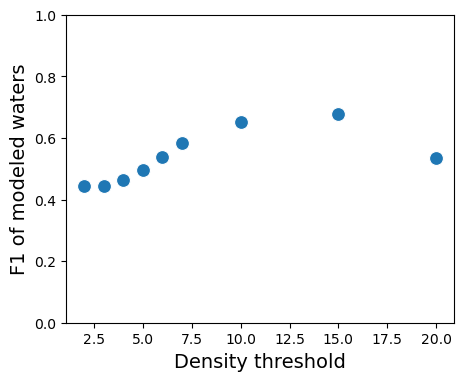

In [8]:
rows = ['2.2_2_0.7-2.3_2_0.7',
        '2.2_3_0.7-2.3_3_0.7','2.2_4_0.7-2.3_4_0.7',
        '2.2_5_0.7-2.3_5_0.7',
        '2.2_6_0.7-2.3_6_0.7','2.2_7_0.7-2.3_7_0.7',
       '2.2_10_0.7-2.3_10_0.7','2.2_15_0.7-2.3_15_0.7',
        '2.2_20_0.7-2.3_20_0.7',]
plt.figure(figsize=(5,4))
plt.xlabel('Density threshold',size=14)
plt.ylabel('F1 of modeled waters',size=14)
plt.ylim(0,1)

to_plot = F1s[F1s.modelA_modelB.isin(rows)]
to_plot['density'] = to_plot.modelA_modelB.apply(lambda x: int(x.split('_')[1].split('-')[0]))

sns.scatterplot(to_plot,y='F1',x='density',s=100)

/tmp/ipykernel_41563/516882327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot['Qscore_min'] = to_plot.modelA_modelB.apply(lambda x: float(x.split('_')[2].split('-')[0]))


<Axes: xlabel='Q-score threshold', ylabel='F1 of modeled waters'>

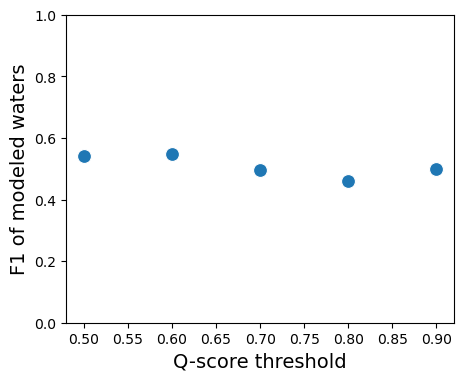

In [9]:
rows = ['2.2_5_0.5-2.3_5_0.5','2.2_5_0.6-2.3_5_0.6','2.2_5_0.7-2.3_5_0.7','2.2_5_0.8-2.3_5_0.8','2.2_5_0.9-2.3_5_0.9']
plt.figure(figsize=(5,4))

to_plot = F1s[F1s.modelA_modelB.isin(rows)]
to_plot['Qscore_min'] = to_plot.modelA_modelB.apply(lambda x: float(x.split('_')[2].split('-')[0]))
plt.xlabel('Q-score threshold',size=14)
plt.ylabel('F1 of modeled waters',size=14)
plt.ylim(0,1)

sns.scatterplot(to_plot,y='F1',x='Qscore_min',s=100)

In [11]:
results

,modelA_modelB,type,amount
0,2.2_5_0.92.3_5_0.9,consensus,6
1,2.2_5_0.92.3_5_0.9,Aonly,5
2,2.2_5_0.92.3_5_0.9,Bonly,7
3,2.2_5_0.82.3_5_0.8,consensus,56
4,2.2_5_0.82.3_5_0.8,Aonly,54
5,2.2_5_0.82.3_5_0.8,Bonly,77
6,2.2_5_0.62.3_5_0.6,consensus,198
7,2.2_5_0.62.3_5_0.6,Aonly,165
8,2.2_5_0.62.3_5_0.6,Bonly,162
9,2.2_5_0.52.3_5_0.5,consensus,213
